# PYTHON OVERFITTING UND REGULARIZATION DEMO

#### TRAINING AND TEST DATASET

X has shape: (100,)
X_train has shape: (80, 1)
X_test has shape: (20, 1)


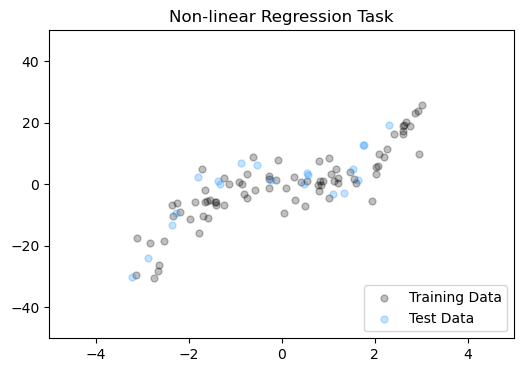

In [6]:
# Create Non-linear Regression Task
import numpy as np

np.random.seed(123)
X = np.linspace(-3, 3, 100) + np.random.randn(100)/5
y = X**3 + np.random.randn(100)*5

# Split into Training and Test Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, shuffle=True, random_state=123)
      
# Reshape Training and Test Data
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test  = X_test.reshape(-1,1)
y_test  = y_test.reshape(-1,1)

print('X has shape: '       + str(X.shape))
print('X_train has shape: ' + str(X_train.shape))
print('X_test has shape: '  + str(X_test.shape))

# Plot Training and Test Data
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Non-linear Regression Task')
plt.scatter(X_train, y_train, color='#000000', marker='o', s=25, alpha=0.25, label='Training Data')
plt.scatter(X_test,  y_test,  color='#118DFF', marker='o', s=25, alpha=0.25, label='Test Data')
plt.legend(loc='lower right')
plt.xlim(-5, 5)
plt.ylim(-50, 50)
plt.show()

#### POLYNOMIAL FEATURES

In [15]:
# Create Polynomial Features up to 10th Degree
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)
print('X_train has shape: '      + str(X_train.shape))
print('X_train_poly has shape: ' + str(X_train_poly.shape))

print('')
print('X_train looks like:')
print(X_train[0,:])

print('')
print('X_train_poly looks like:')
print(X_train_poly[0,:])

X_train has shape: (80, 1)
X_train_poly has shape: (80, 11)

X_train looks like:
[-0.91351502]

X_train_poly looks like:
[ 1.         -0.91351502  0.83450968 -0.76233713  0.69640641 -0.63617771
  0.58115789 -0.53089646  0.48498189 -0.44303824  0.40472208]


#### LINEAR REGRESSION WITHOUT REGULARIZATION


Error on Training Data is: 18.0
Error on Test Data is: 73.65

Thetas of Fitted Model are:
[[ 0.         -2.06689932  5.13469557  4.40545485 -5.61375686 -1.67025397
   1.84514103  0.28553949 -0.23693835 -0.01548981  0.01037046]]

Sum of Thetas: 21.285


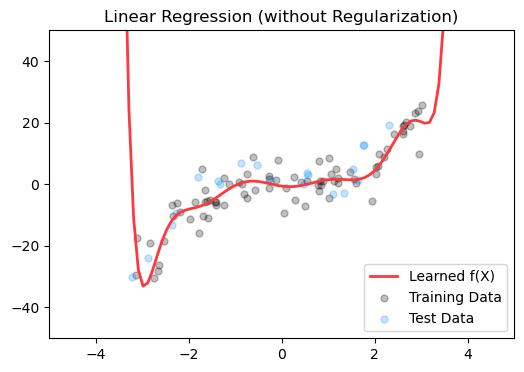

In [23]:
# Fit Linear Regression Model
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()
modelLR.fit(X_train_poly, y_train)

# Use Fitted Model to Make Predictions on Training and Test Data
y_predLR_train = modelLR.predict(X_train_poly)
y_predLR_test  = modelLR.predict(X_test_poly)

# Print Training and Test Error
from sklearn.metrics import mean_squared_error

print('')
print('Error on Training Data is: ' + str(np.round(mean_squared_error(y_train, y_predLR_train), 2)))
print('Error on Test Data is: '     + str(np.round(mean_squared_error(y_test,  y_predLR_test), 2)))

# Print Thetas
print('')
print('Thetas of Fitted Model are:')
print(modelLR.coef_)
print('')
print('Sum of Thetas: ' + str(np.round(np.sum(np.abs(modelLR.coef_)), 3)))

# Use Fitted Model to Make Predictions on the whole Feature Space from -5 to +5
X_space = np.linspace(-5,5,100).reshape(-1,1)
X_space_poly = poly.transform(X_space)
y_predLR_space = modelLR.predict(X_space_poly)

# Plot Data and Fitted Model
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Linear Regression (without Regularization)')
plt.scatter(X_train, y_train, color='#000000', marker='o', s=25, alpha=0.25, label='Training Data')
plt.scatter(X_test,  y_test,  color='#118DFF', marker='o', s=25, alpha=0.25, label='Test Data')
plt.plot(X_space, y_predLR_space, color='#FC393E', linestyle='-', linewidth=2, label='Learned f(X)')
plt.legend(loc='lower right')
plt.xlim(-5, 5)
plt.ylim(-50, 50)
plt.show()

#### RIDGE REGRESSION (L2 PENALTY)


Error on Training Data is: 25.21
Error on Test Data is: 30.21

Thetas of Fitted Model are:
[[ 0.00000000e+00  1.61819414e+00 -1.69800721e-01  2.73750622e-01
  -5.13748169e-03  2.60593328e-02  3.57207792e-04  1.84922152e-03
   1.22400454e-04  7.76422418e-05  2.25015902e-05]]

Sum of Thetas: 2.095


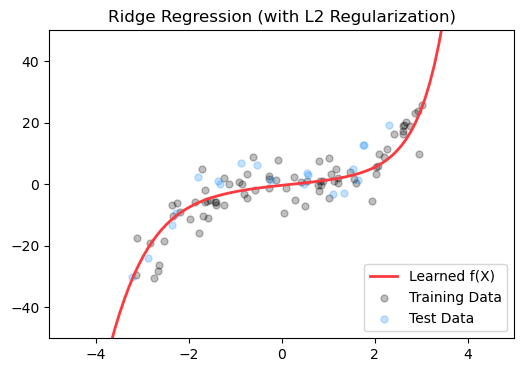

In [29]:
# Fit Ridge Regression Model
from sklearn.linear_model import Ridge

modelRIDGE = Ridge(alpha=0.3, normalize=True, random_state=123)
modelRIDGE.fit(X_train_poly, y_train)

# Use Fitted Model to Make Predictions on Training and Test Data
y_predRIDGE_train = modelRIDGE.predict(X_train_poly)
y_predRIDGE_test  = modelRIDGE.predict(X_test_poly)

# Print Training and Test Error
print('')
print('Error on Training Data is: ' + str(np.round(mean_squared_error(y_train, y_predRIDGE_train), 2)))
print('Error on Test Data is: '     + str(np.round(mean_squared_error(y_test,  y_predRIDGE_test), 2)))

# Print Thetas
print('')
print('Thetas of Fitted Model are:')
print(modelRIDGE.coef_)
print('')
print('Sum of Thetas: ' + str(np.round(np.sum(np.abs(modelRIDGE.coef_)), 3)))

# Use Fitted Model to Make Predictions on the whole Feature Space from -5 to +5
y_predRIDGE_space = modelRIDGE.predict(X_space_poly)

# Plot Data and Fitted Model
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Ridge Regression (with L2 Regularization)')
plt.scatter(X_train, y_train, color='#000000', marker='o', s=25, alpha=0.25, label='Training Data')
plt.scatter(X_test,  y_test,  color='#118DFF', marker='o', s=25, alpha=0.25, label='Test Data')
plt.plot(X_space, y_predRIDGE_space, color='#FC393E', linestyle='-', linewidth=2, label='Learned f(X)')
plt.legend(loc='lower right')
plt.xlim(-5, 5)
plt.ylim(-50, 50)
plt.show()

#### LASSO REGRESSION (L1 PENALTY)


Error on Training Data is: 22.68
Error on Test Data is: 26.07

Thetas of Fitted Model are:
[ 0.          0.42423115 -0.04052442  0.84828361 -0.          0.
  0.         -0.          0.         -0.          0.        ]

Sum of Thetas: 1.313


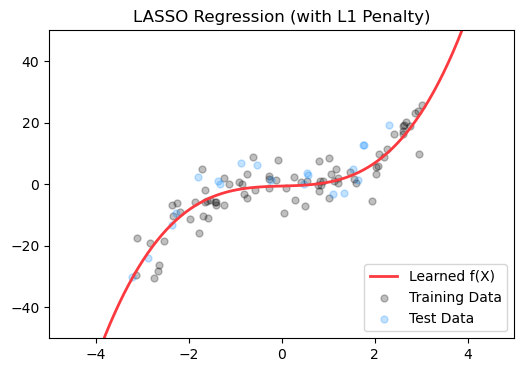

In [31]:
# Fit Lasso Regression Model
from sklearn.linear_model import Lasso

modelLASSO = Lasso(alpha=0.03, normalize=True, random_state=123)
modelLASSO.fit(X_train_poly, y_train)

# Use Fitted Model to Make Predictions on Training and Test Data
y_predLASSO_train = modelLASSO.predict(X_train_poly)
y_predLASSO_test  = modelLASSO.predict(X_test_poly)

# Print Training and Test Error
print('')
print('Error on Training Data is: ' + str(np.round(mean_squared_error(y_train, y_predLASSO_train), 2)))
print('Error on Test Data is: '     + str(np.round(mean_squared_error(y_test,  y_predLASSO_test), 2)))

# Print Thetas
print('')
print('Thetas of Fitted Model are:')
print(modelLASSO.coef_)
print('')
print('Sum of Thetas: ' + str(np.round(np.sum(np.abs(modelLASSO.coef_)), 3)))

# Use Fitted Model to Make Predictions on the whole Feature Space from -5 to +5
y_predLASSO_space = modelLASSO.predict(X_space_poly)

# Plot Data and Fitted Model
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('LASSO Regression (with L1 Penalty)')
plt.scatter(X_train, y_train, color='#000000', marker='o', s=25, alpha=0.25, label='Training Data')
plt.scatter(X_test,  y_test,  color='#118DFF', marker='o', s=25, alpha=0.25, label='Test Data')
plt.plot(X_space, y_predLASSO_space, color='#FC393E', linestyle='-', linewidth=2, label='Learned f(X)')
plt.legend(loc='lower right')
plt.xlim(-5, 5)
plt.ylim(-50, 50)
plt.show()